# Data Science Final Project: Part 2 Analysis

---



This is analysis of the rental data. In this file we will look at implementing our recommendations from Part 1. This first involves cleaning up the data to reduce the MSE. Most of this work is in Data Exploration and Data preprocessing. We also will add external data sources to include new features to the model. 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [198]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [3]:
train_df.sample(5).transpose()

rental_id,7291279,7426432,7388440,7335346,7181437
addr_unit,#1,#2F,#5B,#1,#3S
building_id,279562,1296097,16513,207193,272239
bedrooms,2,2,2,2,1
bathrooms,1,1,1,2,1
size_sqft,0,800,600,1600,800
created_at,2018-06-20 14:47:39,2018-07-31 15:23:29,2018-07-20 17:06:41,2018-07-05 14:40:39,2018-05-16 01:26:56
addr_street,1263 HERKIMER STREET,25-07 24 AVENUE,307 EAST 6 STREET,242 6 AVENUE,860 MACON STREET
addr_city,Brooklyn,Astoria,New York,Brooklyn,Brooklyn
addr_zip,11233,11102,10003,11215,11233
addr_lat,40.6778,40.7749,40.7273,40.674,40.6847


In [4]:
train_df.shape

(12000, 38)

In [5]:
test_df.shape

(2000, 38)

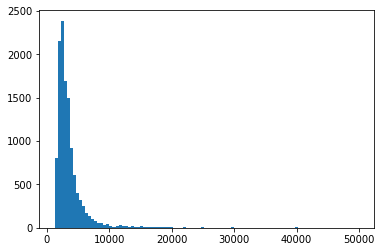

In [6]:
_ = plt.hist(train_df['rent'], bins=100)

In [7]:
train_df['rent'].describe()

count    12000.000000
mean      3605.762917
std       2897.069446
min       1250.000000
25%       2250.000000
50%       2900.000000
75%       3900.000000
max      50000.000000
Name: rent, dtype: float64

In [8]:
train_df['rent'].isna().sum()

0

In [9]:
print(list(train_df))

['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee', 'description', 'neighborhood', 'borough', 'unit', 'floornumber', 'line']


In [10]:
train_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [11]:
train_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,...,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,...,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,...,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,...,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,...,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,...,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,...,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,...,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,...,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,...,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707


In [12]:
# calculate correlation matrix
corr = train_df[["bedrooms", "bathrooms", "min_to_subway", "size_sqft", "floornumber", "year_built","has_doorman", "rent"]].corr()
corr

,bedrooms,bathrooms,min_to_subway,size_sqft,floornumber,year_built,has_doorman,rent
bedrooms,1.000000,0.464287,0.014171,0.525537,-0.158895,-0.056614,-0.233059,0.353337
bathrooms,0.464287,1.000000,0.017966,0.565788,0.116938,-0.004480,0.108987,0.611987
min_to_subway,0.014171,0.017966,1.000000,0.007718,-0.012333,-0.031395,-0.016984,0.000010
size_sqft,0.525537,0.565788,0.007718,1.000000,0.054328,-0.021524,0.047766,0.649984
floornumber,-0.158895,0.116938,-0.012333,0.054328,1.000000,0.095295,0.523314,0.267151
year_built,-0.056614,-0.004480,-0.031395,-0.021524,0.095295,1.000000,0.094629,-0.001037
has_doorman,-0.233059,0.108987,-0.016984,0.047766,0.523314,0.094629,1.000000,0.273486
rent,0.353337,0.611987,0.000010,0.649984,0.267151,-0.001037,0.273486,1.000000


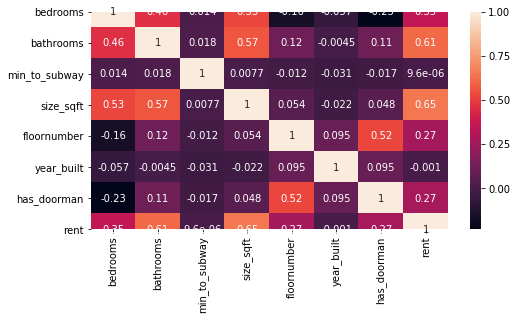

In [302]:
# visualize correlation matrix using a heatmap
plt.subplots(figsize=(8,4))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)



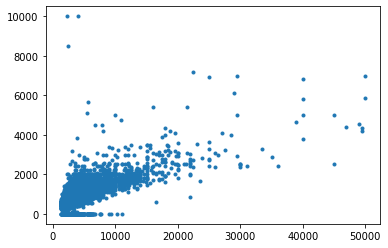

In [14]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

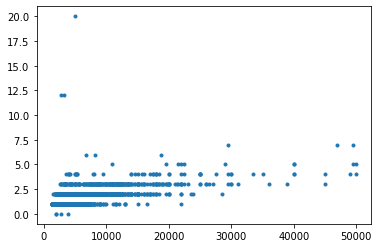

In [15]:
_ = plt.plot(train_df['rent'], train_df['bathrooms'], marker='.', linestyle='none')

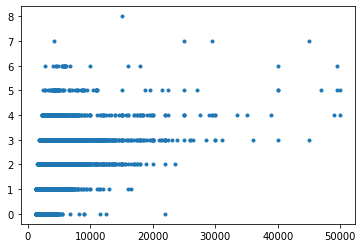

In [16]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [199]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
train_features = train_df[feature_cols] 

Adding a new feature using existing data: Distance to Central Park. Idea: the closer to central park the more the rent. 

In [200]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm(lat1,lon1,lat2=40.78,lon2=-73.965):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [201]:
train_df['dist_centralPark'] = getDistanceFromLatLonInKm(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_centralPark'] = getDistanceFromLatLonInKm(test_df['addr_lat'], test_df['addr_lon'])

In [202]:
train_df['dist_centralPark'].head(20)

rental_id
7236931    14.796742
7331920     7.806511
7139224     2.743952
7364827     3.660724
7242151    11.126183
7171210     2.331770
7286986     7.900183
7418503     2.803593
7304773     3.370226
7180240     2.530775
7199509     6.520788
7374106     7.727537
7211146     5.455471
7205032     9.249498
7303381     6.165054
7257553    10.045174
7371094     9.455008
7386616    19.309963
7161667     1.416285
7256881     1.781116
Name: dist_centralPark, dtype: float64

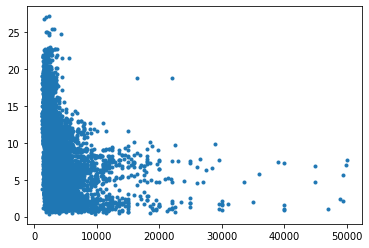

In [21]:
_ = plt.plot(train_df['rent'], train_df['dist_centralPark'], marker='.', linestyle='none')
#plt.xlim(0, 10000)
# not really a correlation

Adding a new feature using existing data: Distance to Time Square. Idea: the closer to time square the more the rent.

In [203]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm2(lat1,lon1,lat2=40.758,lon2=-73.9855):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

Adding the features to the dataFrame

In [204]:
train_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(train_df['addr_lat'], train_df['addr_lon'])
test_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(test_df['addr_lat'], test_df['addr_lon'])

In [205]:
train_df['dist_timeSquare'].head(20)

rental_id
7236931    12.529424
7331920     4.882349
7139224     1.535301
7364827     0.747939
7242151     9.213716
7171210     5.180434
7286986     8.966177
7418503     4.594814
7304773     1.008166
7180240     1.543220
7199509     7.190453
7374106     5.890000
7211146     8.381801
7205032     8.244336
7303381     9.016044
7257553     8.325541
7371094     7.129432
7386616    16.851094
7161667     2.554158
7256881     4.394017
Name: dist_timeSquare, dtype: float64

(0, 10000)

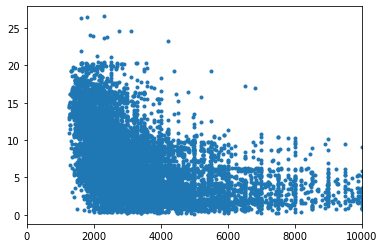

In [25]:
_ = plt.plot(train_df['rent'], train_df['dist_timeSquare'], marker='.', linestyle='none')
plt.xlim(0, 10000)
# not really a correlation

In [206]:
train_df['word_count'] = train_df['description'].str.count(' ') + 1

In [207]:
test_df['word_count'] = test_df['description'].str.count(' ') + 1

### Adding an external dataset of average incomes  

In [208]:
df1 = pd.read_csv('TaxData.csv')

In [209]:
df1.head(10)

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,36,NY,0,0,9580270,4940030,2950010,1479490,8838780,371720,...,365760,2798529,1888640,11352484,7414030,31799173,7191590,22501066,260090,8827498
1,36,NY,10001,0,15340,11080,2700,1170,14110,640,...,2030,10120,4090,58956,10730,79088,10000,41708,920,37351
2,36,NY,10002,0,42290,25770,10170,5480,39040,1880,...,1270,4744,9250,42382,30570,90728,29900,81427,820,9302
3,36,NY,10003,0,28950,22020,5340,870,26870,990,...,5410,79454,8660,123669,19410,214964,16970,83225,2870,131738
4,36,NY,10004,0,2450,1440,790,140,2260,110,...,700,4478,860,17042,1520,27167,1320,9897,230,17239
5,36,NY,10005,0,5920,4360,1240,150,5510,200,...,1240,29145,1730,25399,4080,91656,3690,17112,450,74453
6,36,NY,10006,0,2470,1790,510,90,2290,90,...,430,1568,710,9776,1690,11499,1560,6912,130,4454
7,36,NY,10007,0,3640,2130,1240,140,3370,130,...,1370,19575,1310,43579,2210,75252,1710,19652,560,55206
8,36,NY,10009,0,32690,23370,5090,3470,30080,1290,...,1570,4241,7410,44136,24380,80248,23570,62817,1010,11349
9,36,NY,10010,0,17540,12730,3700,680,16220,610,...,3280,19491,5030,63799,11990,126214,10640,60752,1570,65179


In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Columns: 153 entries, STATEFIPS to A12000
dtypes: int64(152), object(1)
memory usage: 1.8+ MB


Selecting the columns that we want to add to the existing dataFrame

In [211]:
df1 = df1[['STATE', 'ZIPCODE', 'Adjusted gross income (AGI) [5]', 'Total income amount', 'Salaries and wages amount' ]]

In [212]:
df1.rename(columns = {'ZIPCODE':'addr_zip'}, inplace = True)

Next, we are going to merge the two dataFrames and keeping the index as 'rental_id'

In [213]:
train_df = train_df.reset_index().merge( df1, on="addr_zip", how="left").set_index('rental_id')

In [216]:
train_df.head(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,unit,floornumber,line,dist_centralPark,dist_timeSquare,word_count,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount
rental_id,,,,,,,,,,,,,,,,,,,,,
7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,40.646982,...,22A,NaN,NaN,14.796742,12.529424,103.0,NY,2260541.0,2285813.0,1958409.0
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,...,406,4.0,06,7.806511,4.882349,147.0,NY,7343503.0,7420682.0,3664417.0
7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,40.755402,...,18A,18.0,A,2.743952,1.535301,157.0,NY,12031917.0,12169071.0,3589855.0
7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,40.751301,...,23E,23.0,E,3.660724,0.747939,103.0,NY,2425716.0,2452452.0,1091585.0
7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,...,3B,3.0,B,11.126183,9.213716,57.0,NY,1633041.0,1655885.0,1420117.0
7171210,#1C,104077,3,1.0,0.0,2018-05-11 20:59:17,70 WEST 109 STREET,New York,10025,40.800758,...,1C,1.0,C,2.331770,5.180434,45.0,NY,7336328.0,7485255.0,4580000.0
7286986,#1,1345519,3,1.0,850.0,2018-06-19 13:20:57,35-57 87 STREET,Jackson Heights,11372,40.750807,...,1,1.0,NaN,7.900183,8.966177,36.0,NY,1689051.0,1710426.0,1348111.0
7418503,#6G,18341149,0,1.0,500.0,2018-07-28 10:25:29,11-05 30 ROAD,Astoria,11102,40.771198,...,6G,6.0,G,2.803593,4.594814,151.0,NY,1161772.0,1175092.0,997501.0
7304773,#S14A,54856,1,1.0,960.0,2018-06-25 14:04:41,535 WEST 43 STREET,New York,10036,40.761398,...,S14A,14.0,SA,3.370226,1.008166,244.0,NY,5666105.0,5718183.0,2124606.0


In [214]:
test_df = test_df.reset_index().merge( df1, on="addr_zip", how="left").set_index('rental_id')

In [215]:
submit2_df = submit2_df.reset_index().merge( df1, on="addr_zip", how="left").set_index('rental_id')

In [217]:
train_df.info()
## there were not tax data for all zipcodes so we will need to fill the NaN with the median

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7236931 to 7422694
Data columns (total 45 columns):
addr_unit                          11909 non-null object
building_id                        12000 non-null int64
bedrooms                           12000 non-null int64
bathrooms                          12000 non-null float64
size_sqft                          12000 non-null float64
created_at                         12000 non-null object
addr_street                        12000 non-null object
addr_city                          12000 non-null object
addr_zip                           12000 non-null int64
addr_lat                           12000 non-null float64
addr_lon                           12000 non-null float64
bin                                11999 non-null float64
bbl                                12000 non-null int64
floor_count                        12000 non-null float64
year_built                         11597 non-null float64
min_to_subway            

In [219]:
train_df['addr_zip'].describe()

count    12000.000000
mean     10682.779667
std        593.370964
min      10001.000000
25%      10023.000000
50%      11103.000000
75%      11218.000000
max      11694.000000
Name: addr_zip, dtype: float64

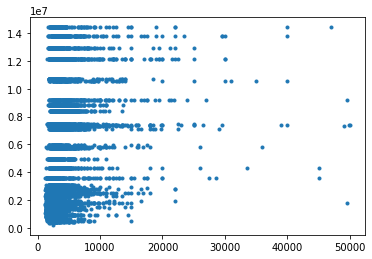

In [220]:
_ = plt.plot(train_df['rent'], train_df['Total income amount'], marker='.', linestyle='none')

### Adding another external dataset: Resturant Inspection 

In [221]:
df2 = pd.read_csv('Cafe.csv')

In [222]:
df2.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50043911,BREAD & JOE,Brooklyn,618,4TH AVE,11215.0,3472234865,Café/Coffee/Tea,2/10/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.664713,-73.993606,307.0,38.0,14300.0,3008953.0,3.006300e+09,BK37
1,41719380,JACKS COFFEE,Manhattan,425,WEST 13 STREET,10014.0,2126752007,Café/Coffee/Tea,2/06/2019,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.740722,-74.006950,102.0,3.0,7900.0,1012241.0,1.006460e+09,MN23
2,41168959,STARBUCKS,Manhattan,731,LEXINGTON AVENUE,10022.0,2126440692,Café/Coffee/Tea,11/17/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.761880,-73.968421,106.0,4.0,11203.0,1086160.0,1.013138e+09,MN19
3,50038867,LELLA ALIMENTARI,Brooklyn,325,MANHATTAN AVE,11211.0,9175359142,Café/Coffee/Tea,08/23/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Re-inspection,40.715164,-73.946215,301.0,34.0,50100.0,3068573.0,3.027530e+09,BK90
4,40399090,EUROPA CAFE,Manhattan,1177,AVENUE OF THE AMERICAS,10036.0,2125757272,Café/Coffee/Tea,07/14/2017,Violations were cited in the following area(s).,...,09/14/2019,Cycle Inspection / Initial Inspection,40.757249,-73.982364,105.0,4.0,11900.0,1076173.0,1.009980e+09,MN17


In [223]:
geo_df = df2[['Latitude', 'Longitude'
]]

In [224]:
#latandlong = geo_df.as_matrix()
latList = geo_df['Latitude'].tolist()
lonList = geo_df['Longitude'].tolist()
lat1 = train_df['addr_lat'].tolist()
lon1 = train_df['addr_lon'].tolist()
tlat1 = test_df['addr_lat'].tolist()
tlon1 = test_df['addr_lon'].tolist()
slat1 = submit2_df['addr_lat'].tolist()
slon1 = submit2_df['addr_lon'].tolist()

Creating a function to calculate the number of cafes within 1 km of the rental houses/apartments

In [225]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getSumCafe(lat1,lon1):
  R = 6371  # Radius of the earth in km
  sums = []
  for lat1, lon1 in zip(lat1, lon1):
    count = 0
    for lat2, lon2 in zip(latList, lonList):
      dLat = deg2rad(lat2-lat1) 
      dLon = deg2rad(lon2-lon1) 
      a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
      c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
      d = R * c  # Distance in km
      #print(d)
      if d < 1 :     
        count += 1
    sums.append(count)
  return sums

Next, we add the sum of number of cafes within 1 km of rental houses to the dataFrame

In [226]:
test_sum = getSumCafe(lat1, lon1)

In [227]:
train_df['cafe'] = test_sum

In [228]:
t2_sum = getSumCafe(tlat1, tlon1)

In [229]:
test_df['cafe'] = t2_sum

In [230]:
s2_sum = getSumCafe(slat1, slon1)

In [231]:
submit2_df['cafe'] = s2_sum

In [232]:
train_df.head(3)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,floornumber,line,dist_centralPark,dist_timeSquare,word_count,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount,cafe
rental_id,,,,,,,,,,,,,,,,,,,,,
7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,40.646982,...,NaN,NaN,14.796742,12.529424,103.0,NY,2260541.0,2285813.0,1958409.0,29
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,...,4.0,06,7.806511,4.882349,147.0,NY,7343503.0,7420682.0,3664417.0,672
7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,40.755402,...,18.0,A,2.743952,1.535301,157.0,NY,12031917.0,12169071.0,3589855.0,461


Now we are going to select the features that we think are going to be useful in training our model

In [316]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark', 'dist_timeSquare',
    'Total income amount', 'cafe', 'word_count'
]
train_features = train_df[feature_cols] 

In [317]:
# extract usable features for test data
test_features = test_df[feature_cols] 

## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. We will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. Because of the outliers we will use the mean.. 

In [235]:
train_df['year_built'].isna().sum()

403

In [236]:
train_df['min_to_subway'].isna().sum()

126

In [237]:
test_df.isna().sum()

addr_unit                           19
building_id                          0
bedrooms                             0
bathrooms                            0
size_sqft                            0
created_at                           0
addr_street                          0
addr_city                            0
addr_zip                             0
addr_lat                             0
addr_lon                             0
bin                                  0
bbl                                  0
floor_count                          0
year_built                          67
min_to_subway                       17
has_doorman                          0
has_elevator                         0
has_fireplace                        0
has_dishwasher                       0
is_furnished                         0
has_gym                              0
allows_pets                          0
has_washer_dryer                     0
has_garage                           0
has_roofdeck             

In [238]:
train_df['floornumber'].isna().sum()

1277

In [239]:
train_df['floornumber'].describe()

count    10723.000000
mean         6.182738
std          7.671545
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         78.000000
Name: floornumber, dtype: float64

In [240]:
test_df['floornumber'].describe()

count    1775.000000
mean        6.291831
std         8.066341
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        71.000000
Name: floornumber, dtype: float64

In [241]:
train_df['min_to_subway'].describe()

count     11874.000000
mean         73.588716
std        2681.611157
min           0.016700
25%           1.616700
50%           2.750000
75%           4.366700
max      103343.616700
Name: min_to_subway, dtype: float64

In [242]:
test_df['min_to_subway'].describe()

count    1983.000000
mean        3.768095
std         4.110479
min         0.016700
25%         1.666700
50%         2.816700
75%         4.458350
max        57.583300
Name: min_to_subway, dtype: float64

In [243]:
train_df['year_built'].describe()

count    11597.000000
mean      1935.982668
std        158.157134
min          0.000000
25%       1915.000000
50%       1931.000000
75%       1987.000000
max       2019.000000
Name: year_built, dtype: float64

In [244]:
test_df['year_built'].describe()

count    1933.000000
mean     1934.515261
std       164.135048
min         0.000000
25%      1915.000000
50%      1931.000000
75%      1987.000000
max      2019.000000
Name: year_built, dtype: float64

In [318]:
# impute missing values with mean
train_features = train_features.fillna(train_features.mean(), axis=0)

# construct target vector
train_target = train_df['rent']

#### 2. Outlier Data
From the above analysis it can be seen that the size_sqft and bathrooms have the value 0 for some data points. It is not possible for a rental space to have no size and it unusal for no bathroom in a rental. 

In [246]:
(train_features['size_sqft']==0).sum()
## 841 values have outlier value of 0 for size_sqft

841

In [247]:
train_features['size_sqft'].describe()

count    12000.000000
mean       850.465750
std        515.773101
min          0.000000
25%        610.000000
50%        800.000000
75%       1000.000000
max      10000.000000
Name: size_sqft, dtype: float64

In [248]:
#train_features['size_sqft']= train_features['size_sqft'].replace(0,train_features['size_sqft'].mean())

The minimum size for new apartments is 400sqft, so we are going to use instead of 0. An apartment or room must cannot physically have 0 sqft

In [249]:
train_features.loc[train_features['size_sqft']==0, 'size_sqft']=400

In [250]:
#test_features.loc[test_features['size_sqft']==0, 'size_sqft']=400

In [251]:
train_features['size_sqft'].describe()

count    12000.000000
mean       878.499083
std        478.292247
min         79.000000
25%        610.000000
50%        800.000000
75%       1000.000000
max      10000.000000
Name: size_sqft, dtype: float64

In [252]:
(train_features['bathrooms']==0).sum()
## 4 values have outlier value of 0 for bathrooms...No bathrooms??
## Because this is only a small amount of data points we will leave as is
## one of the datapoints actually according to the description does not have a bathroom in the apartment! 

4

In [253]:
train_df.loc[train_df.bathrooms == 0]

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,floornumber,line,dist_centralPark,dist_timeSquare,word_count,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount,cafe
rental_id,,,,,,,,,,,,,,,,,,,,,
7340716,NaN,503473,2,0.0,0.0,2018-07-06 17:49:26,319 EAST 52 STREET,Brooklyn,11203,40.653066,...,NaN,NaN,14.449637,12.625579,30.0,NY,1599379.0,1608986.0,1357584.0,6
7414558,#3,158941,1,0.0,880.0,2018-07-27 00:49:29,496 COURT STREET,Brooklyn,11231,40.676940,...,3.0,NaN,11.808926,9.083158,156.0,NY,2648560.0,2697067.0,1859023.0,68
7335802,UNKNOWN,161965,0,0.0,0.0,2018-07-05 16:04:51,230 SMITH STREET,Brooklyn,11231,40.683953,...,NaN,NaN,10.929659,8.255184,4.0,NY,2648560.0,2697067.0,1859023.0,170
7158544,#1C,25639,0,0.0,0.0,2018-05-08 15:44:57,29 WEST 12 STREET,New York,10011,40.735335,...,1.0,C,5.595790,2.660211,62.0,NY,9080628.0,9207647.0,5136080.0,838


In [254]:
(test_features['bathrooms']==0).sum()

3

##### Large data points

In [255]:
train_features.loc[train_features.size_sqft>=8000]

,bedrooms,year_built,bathrooms,min_to_subway,size_sqft,no_fee,has_doorman,has_washer_dryer,floornumber,dist_centralPark,dist_timeSquare,Total income amount,cafe,word_count
rental_id,,,,,,,,,,,,,,
7410124,2,1935.982668,1.0,6.2000,8500.0,0,0,0,47.0,17.153177,14.305187,2695383.0,60,131.0
7352536,2,1955.000000,1.0,11.9833,10000.0,0,0,0,2.0,18.026849,15.303167,1249744.0,14,53.0
7148494,5,1901.000000,1.0,1.4000,9999.0,1,0,0,3.0,9.964682,9.205950,2385630.0,111,72.0


These are clearly errors as the next largest apartment at 7200 sqft has a rent of 22,500 and the next following data points are similar. These apartments are out by a factor of 10. So we will divide these by 10 and the new max sqft should be 7200

In [256]:
 train_features.loc[train_features['size_sqft']>=8000, 'size_sqft']=train_features.loc[train_features.size_sqft>=8000].divide(10)

In [257]:
train_features.size_sqft.describe()

count    12000.000000
mean       876.361658
std        458.316290
min         79.000000
25%        610.000000
50%        800.000000
75%       1000.000000
max       7200.000000
Name: size_sqft, dtype: float64

In [258]:
obd_df = train_df.loc[train_df.bedrooms> 6]
obd_df
# Most of these seem reasonable with the rent and the description

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,floornumber,line,dist_centralPark,dist_timeSquare,word_count,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount,cafe
rental_id,,,,,,,,,,,,,,,,,,,,,
7204471,#1,205114,8,3.0,3500.0,2018-05-24 03:09:47,98 LINCOLN PLACE,Brooklyn,11217,40.676331,...,1.0,NaN,11.570058,9.110862,155.0,NY,2851362.0,2897328.0,2181279.0,203
7217803,#UPPER,20905,7,4.0,5000.0,2018-05-29 21:15:31,116 SULLIVAN STREET,New York,10012,40.726101,...,NaN,NaN,6.790507,3.837968,434.0,NY,3558547.0,3605719.0,1919655.0,677
7356136,NaN,71734,7,4.0,6950.0,2018-07-11 15:50:18,461 EAST 57 STREET,New York,10022,40.757728,...,NaN,NaN,2.501412,2.079118,183.0,NY,12031917.0,12169071.0,3589855.0,217
7146658,NaN,56881,7,7.0,7000.0,2018-05-04 12:49:49,51 WEST 73 STREET,New York,10023,40.777983,...,NaN,NaN,1.070336,2.323677,436.0,NY,13623617.0,13798656.0,6189441.0,190
7371637,#1,283312,7,2.0,1800.0,2018-07-16 16:27:49,1033A DE KALB AVENUE,Brooklyn,11221,40.693642,...,1.0,NaN,9.959251,8.384776,36.0,NY,1764282.0,1784388.0,1571784.0,104


In [259]:
obath_df = train_df.loc[train_df.bathrooms>=8]
obath_df
## These baths are errors as the description says they are only 2 bathrooms so we will change these to 2

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,floornumber,line,dist_centralPark,dist_timeSquare,word_count,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount,cafe
rental_id,,,,,,,,,,,,,,,,,,,,,
7236325,#7,87595,2,20.0,1200.0,2018-06-04 15:07:12,420 EAST 86 STREET,New York,10028,40.776358,...,NaN,NaN,1.414322,3.696479,1.0,NY,10544654.0,10676779.0,4532168.0,239
7151821,#6,126724,3,12.0,1200.0,2018-05-06 20:10:38,821 RIVERSIDE DRIVE,New York,10032,40.835610,...,6.0,NaN,6.383994,9.243970,41.0,NY,1204675.0,1220621.0,1035413.0,58
7160572,#D,951334,2,12.0,1069.0,2018-05-09 10:46:26,105 OCEANA DRIVE EAST,Brooklyn,11235,40.576302,...,NaN,NaN,22.659068,20.341527,21.0,NY,2391564.0,2423909.0,1747241.0,10


In [260]:
 train_features.loc[train_features['bathrooms']>=8, 'bathrooms']=2

In [261]:
train_features['bathrooms'].describe()

count    12000.000000
mean         1.236333
std          0.515107
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: bathrooms, dtype: float64

In [262]:
#sns.pairplot(train_df)

Next, we check the pearson correlation coefficient to see the correlation of some of the features with the rent.

In [263]:
import scipy
from scipy.stats.stats import pearsonr

In [264]:
rent = train_df['rent']
size_sqft = train_df['size_sqft']
cafe = train_df['cafe']
bathrooms = train_df['bathrooms']
dist = train_df['dist_timeSquare']

pearsonr_coefficient, p_value = pearsonr(rent, size_sqft)
print('PearsonR coeff %0.3f' % (pearsonr_coefficient))

PearsonR coeff 0.650


In [265]:
pearsonr_coefficient, p_value = pearsonr(rent, cafe)
print('PearsonR coeff %0.3f' % (pearsonr_coefficient))

PearsonR coeff 0.329


In [266]:
pearsonr_coefficient, p_value = pearsonr(rent, bathrooms)
print('PearsonR coeff %0.3f' % (pearsonr_coefficient))

PearsonR coeff 0.612


In [267]:
pearsonr_coefficient, p_value = pearsonr(rent, dist)
print('PearsonR coeff %0.3f' % (pearsonr_coefficient))

PearsonR coeff -0.324


## Data Modelling 
This section we look at different models and model our training data

In [327]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features, train_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features, train_target)

c:\users\taimoor\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [328]:
test_features = test_df[feature_cols] 

# impute missing values with means
test_features = test_features.fillna(train_features.mean(), axis=0)

In [321]:
# construct predictions for linear regression 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

2986943.1400048467

In [273]:
pd.DataFrame(lreg.coef_, index=feature_cols,  columns = ['Est. Coefficient'])

,Est. Coefficient
bedrooms,-12.107012
year_built,-0.081072
bathrooms,1369.883174
min_to_subway,-0.008231
size_sqft,3.257552
no_fee,-56.991123
has_doorman,314.494969
has_washer_dryer,238.139896
floornumber,25.525389
dist_centralPark,31.681119


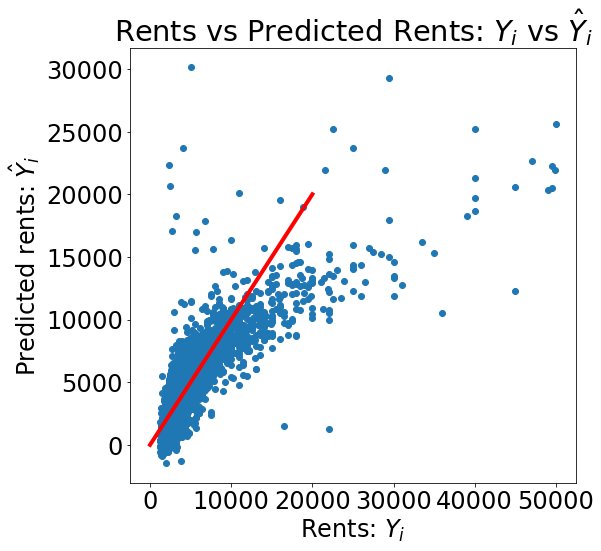

In [322]:
#Making a plot to visualize our prediction

_ = plt.scatter(train_df['rent'], lreg.predict(train_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents: $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

In [329]:
# construct predictions for random forest regression
test_df['predicted'] = rf.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1794007.2253487033

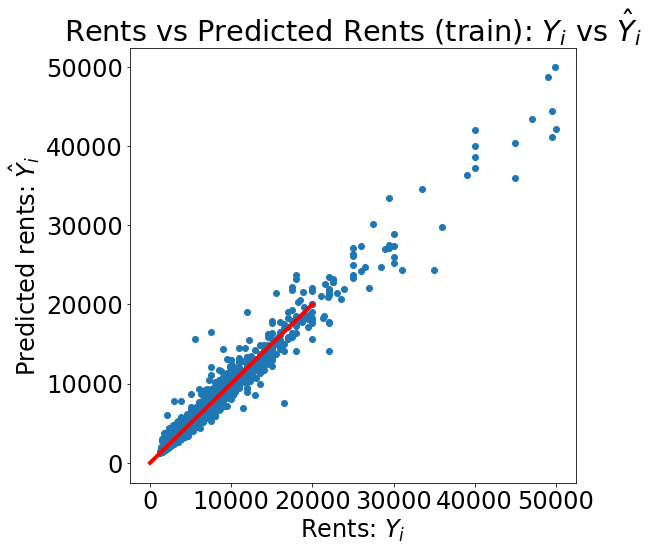

In [332]:
#Making a plot to visualize our prediction

_ = plt.scatter(train_df['rent'], rf.predict(train_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents (train): $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

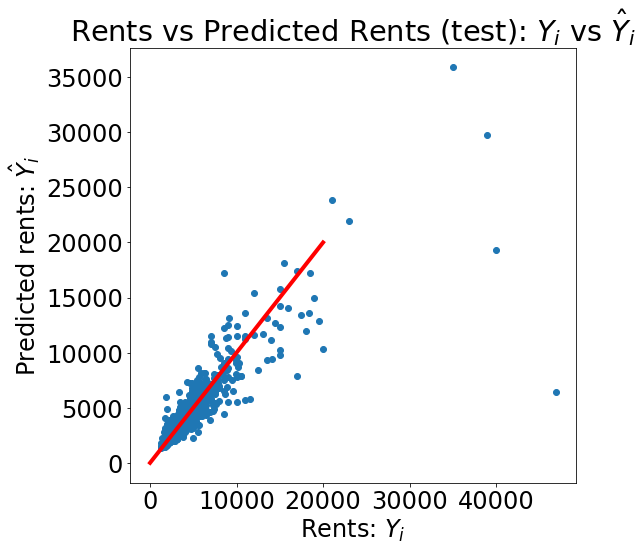

In [333]:
#Making a plot to visualize our prediction

_ = plt.scatter(test_df['rent'], rf.predict(test_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents (test): $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

In [284]:
# construct predictions for gradient boosting regression
test_df['predicted'] = gbt.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1782382.0110717467

### Hyperparameter Tuning

Now we are going to try to optimize our hyperparameters to see if it lowers our mean square error

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [84]:
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                       'bootstrap': bootstrap}

In [85]:
# Create the model to use for hyperparameter tuning
model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [86]:
# Fit on the training data
random_cv.fit(train_features, train_target)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [87]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
18,3.720295,0.228165,0.079136,0.027171,100,10,2,sqrt,15,False,...,-405.429269,-434.127284,18.306400,1,-242.894908,-237.898176,-241.258350,-246.934521,-242.246489,3.251244
6,33.119075,0.121527,0.749949,0.019135,900,6,6,sqrt,15,False,...,-417.890781,-447.744297,20.187324,2,-309.135439,-306.376342,-309.495510,-317.236544,-310.560959,4.038618
8,120.660875,0.309806,0.867129,0.087340,1100,10,2,auto,15,True,...,-422.246399,-453.062522,19.410663,3,-279.477051,-279.215518,-280.524054,-284.832892,-281.012379,2.259465
20,9.283654,0.073533,0.059769,0.015292,100,4,8,auto,15,True,...,-444.017333,-475.521359,20.270269,4,-362.865120,-359.680587,-366.916772,-374.061348,-365.880957,5.374281
15,40.917515,0.221336,0.859317,0.129311,1500,2,4,log2,10,False,...,-448.436172,-479.095164,20.121488,5,-372.227803,-367.060816,-368.934880,-379.050254,-371.818438,4.566635
11,82.601596,0.313498,0.519496,0.052259,1100,10,2,auto,10,True,...,-457.947392,-488.836223,19.308916,6,-374.365550,-372.692535,-373.400719,-376.491126,-374.237482,1.430240
24,10.957692,0.181802,0.070878,0.007233,100,10,1,None,10,True,...,-457.786856,-489.084752,19.699731,7,-373.601669,-373.764825,-374.505691,-375.467115,-374.334825,0.737173
21,3.638181,0.205705,0.089833,0.036653,100,2,8,sqrt,10,False,...,-457.717073,-489.218403,21.060699,8,-408.111100,-404.839790,-409.295660,-418.036829,-410.070845,4.880122
3,109.797577,0.153630,0.925718,0.023108,1500,6,8,auto,10,True,...,-470.462886,-500.276664,18.980672,9,-414.610787,-407.585024,-414.368851,-422.461082,-414.756436,5.266929
13,17.683181,0.144468,0.394505,0.006765,900,2,8,log2,10,True,...,-468.603188,-500.631453,22.435007,10,-439.958225,-435.420523,-440.653551,-450.963355,-441.748913,5.686845


In [88]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [89]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = RandomForestRegressor(max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [90]:
# Fit the grid search
grid_search.fit(train_features, train_target)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.1min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                             

In [308]:
test_features = test_df[feature_cols] 

# impute missing values with mean
test_features = test_features.fillna(train_features.mean(), axis=0)

In [92]:
# construct predictions for linear regression 
test_df['predicted'] = random_cv.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1680410.5767403888

In [93]:
# construct predictions for linear regression 
test_df['predicted'] = grid_search.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

1766326.7660557427

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

|        Model       |                  Description              |         MSE       |
|:-------------------|:-----------------------------------------:|------------------:|
|  Linear Regression | Part 1 Results | 3149962.9103451534|
|   Random Forrest   | Part 1 Results  | 1714305.522788979 |
|  Linear Regression |         Data processed    | 3376496.050180577|
|  Random Forrest    |            Data processed       | 1863485.08330918 |
|  Gradient Boosting | Data processed | 1892829.8327573643
 |  Linear Regression |    Data processed (mean) | 3374010.081873952|
|  Random Forrest    |     Data processed (mean used) | 1793222.516178181 |
|  Gradient Boosting | Data processed | 1930595.698479731
|  Random Forrest    |   Income feature added| 1665017.1774451786 |
|  Gradient Boosting | Income | 1779734.0699590286 |


Notes about analysis:

SQft min of 300 was just an estimated guess for min value.

Changing min number of bedrooms from 0 to 1 increased the MSE for RF model and decreased the importance of the bedrooms feature from 2 to 1%. Dont recommend we do this as 0 bedroom represents studios in general looking at descriptions. 

In [301]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importances, 2)) for feature, importances in zip(test_features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: size_sqft            Importance: 0.48
Variable: bathrooms            Importance: 0.17
Variable: dist_timeSquare      Importance: 0.12
Variable: cafe                 Importance: 0.07
Variable: Total income amount  Importance: 0.03
Variable: bedrooms             Importance: 0.02
Variable: floornumber          Importance: 0.02
Variable: dist_centralPark     Importance: 0.02
Variable: word_count           Importance: 0.02
Variable: year_built           Importance: 0.01
Variable: min_to_subway        Importance: 0.01
Variable: has_doorman          Importance: 0.01
Variable: has_washer_dryer     Importance: 0.01
Variable: no_fee               Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [286]:
r2_score(test_df['rent'], test_df['predicted'])

0.760983954191723

# Modeling Data for Submission

In this section, we will do cross validation to get an idea of how accurate our model is.

In [335]:
train_labels = np.array(train_target)

In [336]:
from sklearn.model_selection import train_test_split

#Split the data into training ans testing
train_features, test_features, train_labels, test_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state = 42)

In [337]:
predictions = rf.predict(test_features)

#Calculate Absolute Error
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 186.23 degrees.
Accuracy: 95.62 %.


In [115]:
predictions = random_cv.predict(test_features)

#Calculate Absolute Error
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 250.97 degrees.
Accuracy: 93.41 %.


In [116]:
predictions = grid_search.predict(test_features)

#Calculate Absolute Error
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 326.99 degrees.
Accuracy: 91.92 %.


### Combine data and Predict Values

In [338]:
master_df = train_df.append(test_df, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']

#Calculate mean absolute percentage
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.62 %.


In [339]:
rf.fit(master_features, master_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [340]:
master_df['predicted'] = rf.predict(master_features)

mean_squared_error(master_df['rent'], master_df['predicted'])

253723.52783169158

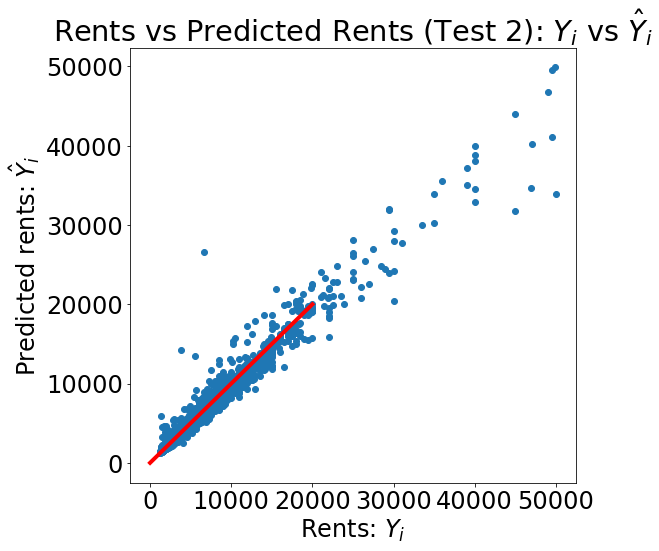

In [343]:
#Making a plot to visualize our prediction

_ = plt.scatter(master_df['rent'], rf.predict(master_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents (Test 2): $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

Adding the new created features to submit2_df

In [292]:
submit2_df['dist_centralPark'] = getDistanceFromLatLonInKm(submit2_df['addr_lat'], submit2_df['addr_lon'])

In [293]:
submit2_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(submit2_df['addr_lat'], submit2_df['addr_lon'])

In [294]:
submit2_df['word_count'] = submit2_df['description'].str.count(' ') + 1

In [295]:
submit2_df.head(10)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,floornumber,line,STATE,Adjusted gross income (AGI) [5],Total income amount,Salaries and wages amount,cafe,dist_centralPark,dist_timeSquare,word_count
rental_id,,,,,,,,,,,,,,,,,,,,,
7455565,#RR1,399352,4,2.0,1200.0,2018-08-08 11:39:21,287 HARMAN STREET,Brooklyn,11237,40.699847,...,1.0,RR,NY,956073.0,969304.0,850669.0,153,9.709081,8.540586,107
7473295,#2R,298804,1,1.0,800.0,2018-08-13 22:42:14,415 STUYVESANT AVENUE,Brooklyn,11233,40.679966,...,2.0,R,NY,1375259.0,1388086.0,1215501.0,65,11.481940,9.809512,96
7459804,#713,55336,0,1.0,525.0,2018-08-09 11:18:53,500 WEST 56 STREET,New York,10019,40.768101,...,7.0,13,NY,7220520.0,7306115.0,3444895.0,312,2.465123,1.177544,123
7456330,#4B,1251607,2,1.0,750.0,2018-08-08 13:33:13,39-44 24 STREET,Long Island City,11101,40.754183,...,4.0,B,NY,1929483.0,1950293.0,1640427.0,45,3.623475,3.960948,74
7443595,#3G,17965342,0,1.0,487.0,2018-08-04 15:00:41,50 EAST 28TH STREET,New York,10016,40.743698,...,3.0,G,NY,8331163.0,8419008.0,4340176.0,738,4.377187,1.590654,102
7502623,#10,19939,1,1.0,0.0,2018-08-23 00:09:46,65 SULLIVAN STREET,New York,10012,40.724282,...,NaN,NaN,NY,3558547.0,3605719.0,1919655.0,637,7.007716,4.056298,1
7459171,#11A,59674,1,1.0,750.0,2018-08-09 08:57:14,201 WEST 77TH STREET,New York,10024,40.782153,...,11.0,A,NY,12001303.0,12182779.0,5658206.0,191,1.240620,2.733483,98
7447600,#1J,98035,0,1.0,284.0,2018-08-06 14:37:24,48 WEST 138 STREET,New York,10037,40.815399,...,1.0,J,NY,542923.0,547712.0,448940.0,29,4.524369,7.509610,90
7505254,#5K,302296,2,1.0,980.0,2018-08-23 16:49:41,756 MYRTLE AVENUE,Brooklyn,11206,40.694818,...,5.0,K,NY,1564849.0,1584502.0,1328101.0,91,9.535267,7.572543,78


### Create Submission File for test3

In [296]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = rf.predict(submit2_features)
submit2_df['predictions'].to_csv('sample_submission3.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], submit2_df['fake_rent'])

4668482.0380680775